# Predict Big Mart Sales

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
#Load Data
df = pd.read_csv('df_bmsales.csv')

In [4]:
df.shape

(8523, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  MRPperUnit                 7060 non-null   float64
 13  Years_Open                 8523 non-null   int64

In [6]:
df['Outlet_Size'] = df.Outlet_Size.astype('category')
df['Outlet_Location_Type'] = df.Outlet_Location_Type.astype('category')

## 4. Modeling

### 4.1 Data Splitting, Imputation , Scaling and Encoding

In [7]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import math
import datetime

In [8]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRPperUnit,Years_Open
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,b,a,Supermarket Type1,3735.1380,26.861204,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,b,c,Supermarket Type2,443.4228,8.153581,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,b,a,Supermarket Type1,2097.2700,8.092457,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,c,Grocery Store,732.3800,9.484115,15
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,c,c,Supermarket Type1,994.7052,6.031512,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,c,c,Supermarket Type1,2778.3834,31.248623,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,b,Supermarket Type1,549.2850,12.906563,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,a,b,Supermarket Type1,1193.1136,8.030415,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,b,c,Supermarket Type2,1845.5976,14.304189,4


In [9]:
X = df.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'MRPperUnit'])
y = df.Item_Outlet_Sales

In [10]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Open
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,b,a,Supermarket Type1,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,b,c,Supermarket Type2,4
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,b,a,Supermarket Type1,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,c,Grocery Store,15
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,c,c,Supermarket Type1,26


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [12]:
cat_bins=['a','b','c']

In [13]:
#list of non-numerical columns
cat_list = [
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Type']

In [14]:
#get the unique value by column
Col_ohe=[]
for col in cat_list:
    Col_ohe.extend(list(df[col].unique()))
    

In [15]:
#list of category type columns
blist = ['Outlet_Size','Outlet_Location_Type']

In [16]:
#list of numerical columns
col_list = ['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']
num_list = list(df.drop(columns=col_list).drop(columns=['MRPperUnit','Item_Outlet_Sales', 'Outlet_Establishment_Year'],axis=1))

In [17]:
num_list

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Years_Open']

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Weight           4943 non-null   float64 
 1   Item_Fat_Content      5966 non-null   object  
 2   Item_Visibility       5966 non-null   float64 
 3   Item_Type             5966 non-null   object  
 4   Item_MRP              5966 non-null   float64 
 5   Outlet_Identifier     5966 non-null   object  
 6   Outlet_Size           4276 non-null   category
 7   Outlet_Location_Type  5966 non-null   category
 8   Outlet_Type           5966 non-null   object  
 9   Years_Open            5966 non-null   int64   
dtypes: category(2), float64(3), int64(1), object(4)
memory usage: 431.4+ KB


In [19]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

Bin_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#combine numeric and categorical pipelines
preprocess_pipe = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list),
        ('bincat', Bin_transformer, blist),
        ('cat', categorical_transformer, cat_list)
    ])


In [20]:

# fit the pipelines to the training data
preprocess_pipe.fit_transform(X_train)

# apply the pipelines to the training and test data
X_train = preprocess_pipe.transform(X_train)
X_test = preprocess_pipe.transform(X_test)

In [21]:
X_train = pd.DataFrame.sparse.from_spmatrix(X_train, columns = (num_list+blist+Col_ohe))
X_test = pd.DataFrame.sparse.from_spmatrix(X_test, columns = (num_list+blist+Col_ohe))

In [22]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Open,Outlet_Size,Outlet_Location_Type,Low Fat,Regular,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Frozen Foods,Breakfast,Health and Hygiene,Hard Drinks,Canned,Breads,Starchy Foods,Others,Seafood,OUT049,OUT018,OUT010,OUT013,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
0,-1.225867,1.606681,-0.401895,-0.015833,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.627719,-1.008442,-0.619284,0.103437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.056443,-0.227068,-0.202535,1.534680,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.532837,1.028038,1.290187,-0.492914,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.295631,0.515355,0.686853,1.296139,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Dummy model

In [23]:

#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

2204.8825196781763

In [24]:
#Fit the dummy regressor on the training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[2204.88251968]])

### 4.2 Linear Regression Model

### Linear regression base model

In [25]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [26]:
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.5550817520449153
STD:  0.011329616320065196




### Linear Regression Model 1

In [27]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Years_Open,Outlet_Size,Outlet_Location_Type,Low Fat,Regular,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Frozen Foods,Breakfast,Health and Hygiene,Hard Drinks,Canned,Breads,Starchy Foods,Others,Seafood,OUT049,OUT018,OUT010,OUT013,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
0,-1.225867,1.606681,-0.401895,-0.015833,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.627719,-1.008442,-0.619284,0.103437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.056443,-0.227068,-0.202535,1.534680,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.532837,1.028038,1.290187,-0.492914,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.295631,0.515355,0.686853,1.296139,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,-0.828548,4.316492,-0.042005,-0.015833,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5962,0.643315,1.013011,-1.056288,-1.089266,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5963,1.117726,-0.917573,1.525729,-0.492914,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5964,1.770043,-0.224287,-0.381136,-1.089266,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
kbest = SelectKBest(f_regression) 

    
pipeline = make_pipeline(kbest, LinearRegression())
# define search parameters
k = [k+1 for k in range(len(X_train))]
params = {'selectkbest__k': k}
search = GridSearchCV(pipeline, param_grid=params, n_jobs=-1, cv=5, verbose=0)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print(f"Best Score: {result.best_score_}")
print(f"Best Hyperparameters: {result.best_params_}")

Best Score: 0.5574033788191273
Best Hyperparameters: {'selectkbest__k': 8}


In [29]:
score_mean = result.cv_results_['mean_test_score']
score_std = result.cv_results_['std_test_score']
cv_k = [k for k in result.cv_results_['param_selectkbest__k']]

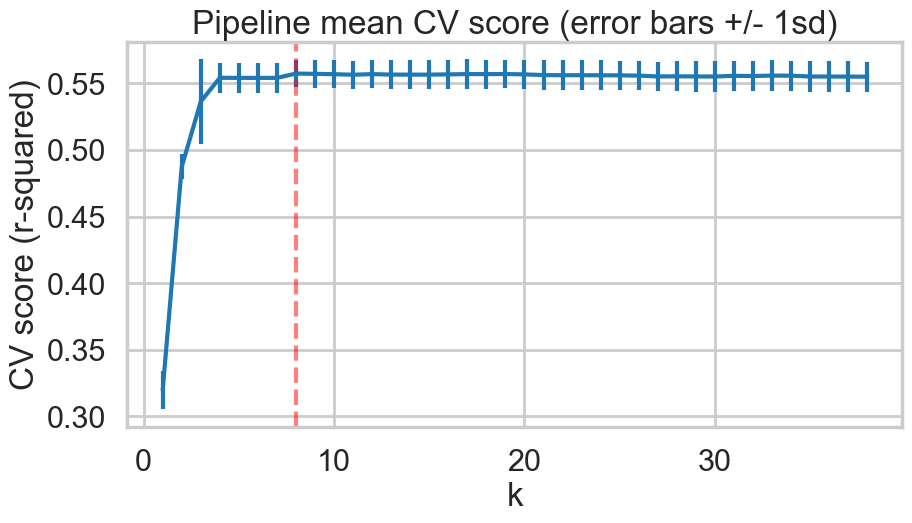

In [30]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = result.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [31]:
selected = result.best_estimator_.named_steps.selectkbest.get_support()
print(selected)

[False  True  True False False False False False False False False False
 False False False False False False False False False False False False
  True False False False  True  True False False False False  True  True
 False  True]


In [32]:
#get the matching feature names from the column names of the dataframe,
coefs = result.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Item_MRP              988.407867
OUT045                848.797035
Supermarket Type3     848.797035
Supermarket Type2     320.131546
Item_Visibility       -26.072728
OUT027               -544.942290
OUT049               -554.680687
Supermarket Type1   -1099.622978
dtype: float64

In [33]:
y_te_pred = result.best_estimator_.predict(X_test)

In [34]:
r2_score(y_test, y_te_pred)

0.5694169446255513

In [35]:
mean_absolute_error(y_test, y_te_pred)

810.5064249477376

In [36]:
mean_squared_error(y_test, y_te_pred)

1206060.3510953407

### Ridge Regression Model 2

In [37]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [38]:
ridge = Ridge(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score MSE: ', -grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score MSE:  1314165.8340137475
Best Params:  {'alpha': 10}


#### Ridge optimizing R-squared

In [39]:
ridge = Ridge(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=ridge, param_grid=param_grid, scoring='r2', verbose=0, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score R-squared: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score R-squared:  0.5554112937986633
Best Params:  {'alpha': 10}


In [40]:
y_te_pred =grid_result.best_estimator_.predict(X_test)

In [41]:
r2_score(y_test, y_te_pred)

0.5681383470827992

In [42]:
mean_absolute_error(y_test, y_te_pred)

809.980123312254

In [43]:
mean_squared_error(y_test, y_te_pred)

1209641.6945366894

### Lasso Regression Model 3

#### Lasso optimizing MSE 

In [44]:
lasso = Lasso(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score MSE: ', -grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183509766.8773375, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 909022691.0510192, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876599102.638977, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.

Best Score MSE:  1312163.7727328837
Best Params:  {'alpha': 10}


#### Lasso optimizing R-squared

In [45]:
lasso = Lasso(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=lasso, param_grid=param_grid, scoring='r2', verbose=0, n_jobs=-1)
lasso_result = grid.fit(X_train, y_train)
print('Best Score R-squared: ', lasso_result.best_score_)
print('Best Params: ', lasso_result.best_params_)

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876599102.638977, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916655005.6361775, tolerance: 1404041.2276071657
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1053411767.953805, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.

Best Score R-squared:  0.5560873723704435
Best Params:  {'alpha': 10}


In [46]:
y_te_pred =lasso_result.best_estimator_.predict(X_test)

In [47]:
r2_score(y_test, y_te_pred)

0.5683220915688132

In [48]:
mean_absolute_error(y_test, y_te_pred)

809.7504137906217

In [49]:
mean_squared_error(y_test, y_te_pred)

1209127.0274206758

### ElasticNet Regression Model 4

#### ElasticNet optimizing MSE 

In [50]:
elastic_net = ElasticNet(random_state= 42)
# find optimal alpha with grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid = GridSearchCV( estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
el_result = grid.fit(X_train, y_train)
print('Best Score MSE: ', -el_result.best_score_)
print('Best Params: ', el_result.best_params_)

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2001749407.8971655, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3116697521.617508, tolerance: 1420001.9457538296
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3062158468.3680696, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/pytho

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2864245815.076335, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2714123735.244818, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2718846023.9612, tolerance: 1404041.2276071657
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183509766.8773375, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75630392.01606274, tolerance: 1420001.9457538296
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130104748.3776312, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/pytho

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7121221141.100705, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7000423266.541829, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6975906546.345051, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3

Best Score MSE:  1312163.7727328837
Best Params:  {'alpha': 10, 'l1_ratio': 1}


/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7097135231.252927, tolerance: 1420001.9457538296
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7035889429.086556, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(


In [51]:
y_te_pred =el_result.best_estimator_.predict(X_test)

In [52]:
r2_score(y_test, y_te_pred)

0.5683220915688132

In [53]:
mean_absolute_error(y_test, y_te_pred)

809.7504137906217

In [54]:
mean_squared_error(y_test, y_te_pred)

1209127.0274206758

#### ElasticNet optimizing R-squared 

In [55]:
elastic_net = ElasticNet(random_state= 42)
# find optimal alpha with grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid = GridSearchCV( estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=0, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score R-squared: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3062158468.3680696, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3159544623.420997, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3116697521.617508, tolerance: 1420001.9457538296
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2703020976.8687086, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2718846023.9612, tolerance: 1404041.2276071657
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2714123735.244818, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.1

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3203814526.403012, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3159759993.5236526, tolerance: 1404041.2276071657
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183509766.8773375, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7000423266.541829, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7121221141.100705, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6750817838.226009, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3

Best Score R-squared:  0.5560873723704435
Best Params:  {'alpha': 10, 'l1_ratio': 1}


/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7017441728.042839, tolerance: 1404041.2276071657
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6992787439.343843, tolerance: 1404041.2276071657
  model = cd_fast.sparse_enet_coordinate_descent(


### 3.4 XGBoost Model 5

In [56]:
import xgboost as xgb
from xgboost import XGBRegressor

#### XGB optimizing MSE 

In [57]:
param_grid={"learning_rate": ( 0.05, 0.10, 0.15),
            "max_depth": [ 3, 6],
            "reg-lambda":[0.5, 1, 10, 40],
            "reg_alpha":[0, 1, 10],
            "gamma":[ 0.0, 0.1, 0.2],
            "colsample_bytree":[ 0.3, 0.4],
            'n_estimators': [500, 1000]}
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(), param_grid = param_grid,
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

gsc.fit(X_train, y_train)

print("Best parameters:", gsc.best_params_)
print("Lowest MSE: ", -gsc.best_score_)
print("Lowest RMSE: ", (-gsc.best_score_)**(1/2.0))


[15:24:03] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:24:03] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:24:03] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:24:03] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:24:03] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:08] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:24:03] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:24:08] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:26:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:33] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:43] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:26:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:33] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:43] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:26:33] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:43] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:47] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:26:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:42] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:45] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:26:33] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:43] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:26:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:42] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:26:42] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:50] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:51] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:26:43] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:47] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:47] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:26:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:29:01] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:03] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:09] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:29:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:09] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:13] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:14] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:29:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:13] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:15] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:17] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:31:54] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:31:56] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:31:58] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:00] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:02] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:29:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:13] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:15] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:17] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:19] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:29:19] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:27] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:34] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:29:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:27] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:34] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:35] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:29:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:26] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:34] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:37] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:29:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:35:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

Best parameters: {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'reg-lambda': 0.5, 'reg_alpha': 1}
Lowest MSE:  1225598.3803430938
Lowest RMSE:  1107.0674687403175


#### XGB optimizing R-squared 

In [58]:
param_grid={"learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3],
            "min_child_weight": [ 1 ],
            "reg_alpha":[ 100, 1000],
            "gamma":[ 0.0, 0.2],
            "colsample_bytree":[ 0.5, 0.7],
            'n_estimators': [500, 1000]}
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(), param_grid = param_grid,
            cv=3, scoring='r2', verbose=0, n_jobs=-1)

gsc.fit(X_train, y_train)

print("Best parameters:", gsc.best_params_)
print("R-squared: ", gsc.best_score_)


Best parameters: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 1000}
R-squared:  0.5941806170034056


In [59]:
xgbbest_model = gsc.best_estimator_

In [60]:
y_te_pred =xgbbest_model.predict(X_test)

In [61]:
r2_score(y_test, y_te_pred)

0.6049743924130695

In [62]:
mean_absolute_error(y_test, y_te_pred)

739.5567884621183

In [63]:
 mean_squared_error(y_test, y_te_pred)

1106464.1699930101

### 3.5 Random Forest Model

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rfr = RandomForestRegressor(random_state= 42)
grid_params = {
    'n_estimators': [100,500,1000],
    'max_depth': [3,6,12,24]}

rf_grid_cv = GridSearchCV(estimator=rfr, scoring='r2', param_grid=grid_params, cv=3, n_jobs=-1, verbose=0)

rf_result =rf_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score R-squared: {rf_result.best_score_}")
print(f"Best Hyperparameters: {rf_result.best_params_}")

[15:32:14] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:18] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:22] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:24] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

Best Score R-squared: 0.5928060030431561
Best Hyperparameters: {'max_depth': 6, 'n_estimators': 500}


In [66]:
rfr = RandomForestRegressor(random_state= 42)
grid_params = {
    'n_estimators': [100,500,1000],
    'max_depth': [3,6,12,24]}

rf_grid_cv = GridSearchCV(estimator=rfr, scoring='neg_mean_squared_error', param_grid=grid_params, cv=3, n_jobs=-1, verbose=0)

rf_result =rf_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score MSE: {-rf_result.best_score_}")
print(f"Best Hyperparameters: {rf_result.best_params_}")

Best Score MSE: 1203182.9908669044
Best Hyperparameters: {'max_depth': 6, 'n_estimators': 500}


In [67]:
y_te_pred =rf_result.best_estimator_.predict(X_test)

In [68]:
r2_score(y_test, y_te_pred)

0.6008130128607857

In [69]:
mean_absolute_error(y_test, y_te_pred)

736.3077507463865

In [70]:
mean_squared_error(y_test, y_te_pred)

1118120.1671838511

## 4. Final Model Selection

### XGBoost Model

In [71]:
xgbbest_model = gsc.best_estimator_
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
xgb_neg_mae = cross_validate(xgbbest_model, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [72]:
xgb_mae_mean = np.mean(-1 * xgb_neg_mae['test_score'])
xgb_mae_std = np.std(-1 * xgb_neg_mae['test_score'])
xgb_mae_mean, xgb_mae_std

(771.7610668405233, 18.74408873629883)

In [73]:
mean_absolute_error(y_test, xgbbest_model.predict(X_test))

739.5567884621183

### RF Model

In [74]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
rf_neg_mae = cross_validate(rf_result.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [75]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(768.3280266998303, 20.635267418151944)

In [76]:
mean_absolute_error(y_test, rf_result.predict(X_test))

736.3077507463865

XGBoost model is the best model with the highest R-squared and the lowest MSE, RMSE and MAE

## Save best model

In [77]:
import os
import sys

In [78]:
import pickle

In [79]:
best_model = xgbbest_model
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [80]:
# save the model to disk
filename = 'bigmart_sales_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

[15:32:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:32] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:34] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:32:34] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:42] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:44] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:32:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:24] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:27] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:29] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:32:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:42] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:44] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:52] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:56] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h

[15:32:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:32] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:34] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "reg-lambda" } are not used.

[15:32:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h